In [240]:
import numpy as np
import tensorflow as tf
import keras as ks
import seaborn as sns
import scipy.stats as sp_stats
import scipy as scipy
plt.xkcd();

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
#for i in dir(mnist):
#    print(i)
print(type(mnist))
print(mnist.count)
print(mnist.index)
print(mnist.test)
print(mnist.train)
print(mnist.validation,)


<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
<built-in method count of Datasets object at 0x00000214E879D9A8>
<built-in method index of Datasets object at 0x00000214E879D9A8>


In [7]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(len(np.unique(mnist.train.labels)))
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(55000, 784)
(55000,)
10
(10000, 784)
(10000,)


In [8]:
np.sqrt(784)

28.0

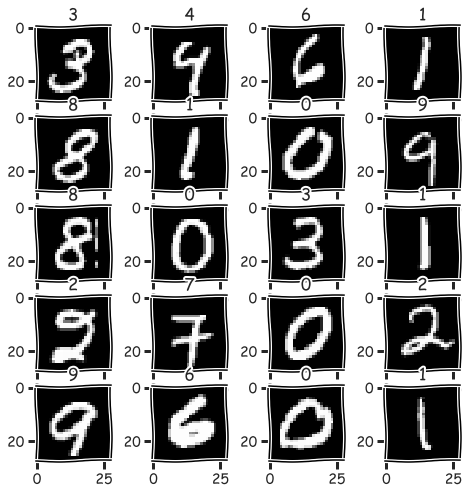

In [9]:
#plt(mnist.train.images[0])
arr1 = mnist.train.images[0].reshape(28,28)
arr2 = mnist.train.images[1].reshape(28,28)

#plt.imshow(arr1)
#plt.imshow(arr2)

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    img = mnist.train.images[i].reshape(28,28)
    title = mnist.train.labels[i]
    this_sub = plt.subplot(rows, columns, i)
    this_sub.set_title(title)
    plt.imshow(img,cmap="gray")

plt.show()

In [22]:
Y_train = mnist.train.labels
Y_test  = mnist.test.labels
def one_hot(t):
    #print(t)
    
    hot = np.zeros(10)
    hot[t] = 1
    #print(hot)


In [23]:
one_hot(Y_train[0])

In [34]:
Y_oh = np.zeros([Y_train.shape[0], 10])

In [35]:
print(Y_oh)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [55]:
names, count = np.unique(Y_train, return_counts=True)
list(zip(names,count))

[(0, 5444),
 (1, 6179),
 (2, 5470),
 (3, 5638),
 (4, 5307),
 (5, 4987),
 (6, 5417),
 (7, 5715),
 (8, 5389),
 (9, 5454)]

In [46]:
Y_oh[np.arange(len(Y_train)), Y_train] = 1

In [56]:
print(Y_oh)
print(sum(Y_oh))



[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
[ 5444.  6179.  5470.  5638.  5307.  4987.  5417.  5715.  5389.  5454.]


In [102]:
%%timeit
def one_hot_encode(arr,n):
    arr1h = np.zeros([arr.shape[0], n],dtype=bool) # Init array
    arr1h[np.arange(len(Y_train)), Y_train] = 1 # Assign
    return arr1h

Y_1h = one_hot_encode(Y_train,10)
Y_1h

570 µs ± 4.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [103]:
%%timeit
def one_hot_encode(arr,n):
    arr1h = np.zeros([arr.shape[0], n]) # Init array
    arr1h[np.arange(len(Y_train)), Y_train] = 1 # Assign
    return arr1h

Y_1h = one_hot_encode(Y_train,10)
Y_1h

1.75 ms ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [100]:
def one_hot_decode(arr):
    #num_classes = arr.shape[1]
    new = np.where(arr==1)[1]
    return new 

In [101]:
Y_train_back = one_hot_decode(Y_1h)
print(Y_train_back[0:4])

[7 3 4 6]


In [172]:
#m_small = mnist.train.images[0:50]
m_small = mnist.train.images[:]
m_small_label = mnist.train.labels[:]

select1 = m_small[m_small_label==1]
#centroids = m_small.mean(axis=0)
print(select1, select1.shape)
#m_small

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (6179, 784)


In [173]:
centroid1 = select1.mean(axis=0)
centroid1.shape

    

(784,)

In [174]:
centroids = np.empty([10,784])
for i in range(10):
    select = m_small[m_small_label==i]
    this_centroid = select.mean(axis=0)
    centroids[i,:] = this_centroid
    #print(i)
print(centroids)


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


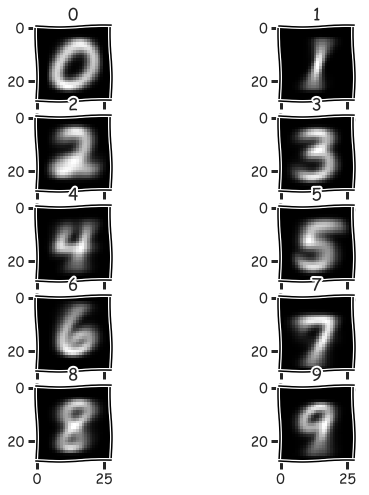

In [179]:
#arr1 = mnist.train.images[0].reshape(28,28)
#arr2 = mnist.train.images[1].reshape(28,28)

#plt.imshow(arr1)
#plt.imshow(arr2)

w=20
h=20
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 5
for i in range(10):
    #img = np.random.randint(10, size=(h,w))
    img = centroids[i].reshape(28,28)
    title = i
    this_sub = plt.subplot(rows, columns, i+1)
    this_sub.set_title(title)
    plt.imshow(img,cmap="gray")

plt.show()

## EVERY IMAGE IS A POINT IN 784 DIMENSION EUCLIDIAN SPACE

In [194]:
test_imgs = mnist.test.images[:]
test_labels = mnist.test.labels[:]
this_img = test_imgs[0]

7

In [195]:
def get_dist(this_img, centroids):
    distances = list()
    for i in range(10):

        dist = np.sqrt(sum((this_img - centroids[i,:])**2))
        distances.append(dist)
        #print(dist)
        #min(dist)
        #$np.sqrt(sum((this_img - centroid[1])**2))
    return np.argmin(distances)
get_dist(this_img, centroids)

7

In [224]:
def get_distances(this_img, centroids):
    distances = list()
    for i in range(10):

        dist = np.sqrt(sum((this_img - centroids[i,:])**2))
        distances.append(dist)
        #print(dist)
        #min(dist)
        #$np.sqrt(sum((this_img - centroid[1])**2))
    return distances
#get_dist(this_img, centroids)

In [209]:
results = np.empty(test_imgs.shape[0])
print(results.shape)

for i,img in enumerate(test_imgs[:]):
    #print(img)
    results[i] = get_dist(img, centroids)
   # break
    #get_dist(img,centroids)
    


(10000,)


In [210]:
print(results[0:5])

[ 7.  2.  1.  0.  4.]


In [218]:
accuracy = sum(results == test_labels)/len(test_labels)
print("{:0.3}%".format(accuracy*100))

82.1%


## First improvement, removing inner for-loop

In [233]:
# test_images are size 10000 rows, 784 columns
# centroids are size 10 rows, 784 columns

# For each row in 10000 in test set, find the corresponding minimum distance compared to all centroids

# Therefore, place each distance vector (10 long) into a row

In [256]:
%%timeit
results2 = np.empty([test_imgs.shape[0],10])
#print(results2.shape)
for i, img in enumerate(test_imgs): 
    results2[i,:] = get_distances(img,centroids)

9.76 s ± 85.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [235]:
min_r2 = np.argmin(results2,axis=1)

In [236]:
print(min_r2[0:5])

[7 2 1 0 4]


In [237]:
sum(min_r2 == test_labels)

8208

In [241]:
scipy.spatial.distance.cdist

<module 'scipy.spatial' from 'C:\\anaconda3\\lib\\site-packages\\scipy\\spatial\\__init__.py'>

In [255]:
%%timeit
distancesSP = scipy.spatial.distance.cdist(test_imgs, centroids)

111 ms ± 962 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [250]:
print(distancesSP.shape)
res2 = np.argmin(distancesSP,axis=1)

(10000, 10)


In [253]:
sum(res2 == test_labels)

8208

## Even better, one liner with broadcasting ???

In [258]:
#```python
ypredicted = np.argmin(np.sum((test_imgs[:,np.newaxis,:] - centroids[np.newaxis]) ** 2, axis=2), axis=1)
#```

In [259]:
sum(ypredicted == test_labels)

8208